# Projenin Amacı ve Genel Bakış
Bu proje, örnek olarak ale alınan Apple Inc. (AAPL) hisse senedi fiyatlarını tahmin etmek amacıyla çeşitli makine öğrenimi modellerini kullanarak bir analiz ve tahmin çalışması yapmaktadır. Projenin temel amacı, geçmiş fiyat verilerini kullanarak gelecekteki fiyat hareketlerini tahmin etmek ve bu tahminlerin doğruluğunu değerlendirmektir. Bu bağlamda, Random Forest Regressor ve Gradient Boosting Regressor modelleri kullanılarak iki farklı tahmin yöntemi incelenmiştir.

# Kullanılan Kütüphaneler


*   yfinance: Hisse senedi verilerini almak için kullanılır.
*   pandas: Veri işleme ve analiz için kullanılır.
*   numpy: Sayısal işlemler için kullanılır.
*   matplotlib: Grafik çizimi için kullanılır.
*   seaborn: Grafiklerin estetik görünümünü artırmak için kullanılır.
*   scikit-learn: Makine öğrenimi modelleri ve veri bölme işlemleri için kullanılır.



# Veri Toplama
Hisse senedi verileri yfinance kütüphanesi kullanılarak alınmıştır. Aşağıdaki kod parçası, AAPL hisse senedi verilerini 12 Haziran 2020 ile 12 Haziran 2024 tarihleri arasında indirir:

In [1]:
import yfinance as yf

ticker = 'AAPL'
stock_data = yf.download(ticker, start='2020-06-12', end='2024-06-12')

[*********************100%%**********************]  1 of 1 completed


# Veri İncelemesi ve Görselleştirme
İndirilen verilerin genel bir incelemesi yapılmış ve fiyat hareketleri görselleştirilmiştir. Veri setinde eksik veri olup olmadığı kontrol edilmiştir

In [2]:
missing_data = stock_data.isnull().sum()
print(missing_data)
#Eksik veri olmadığı için bu adımı geçtim

Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64


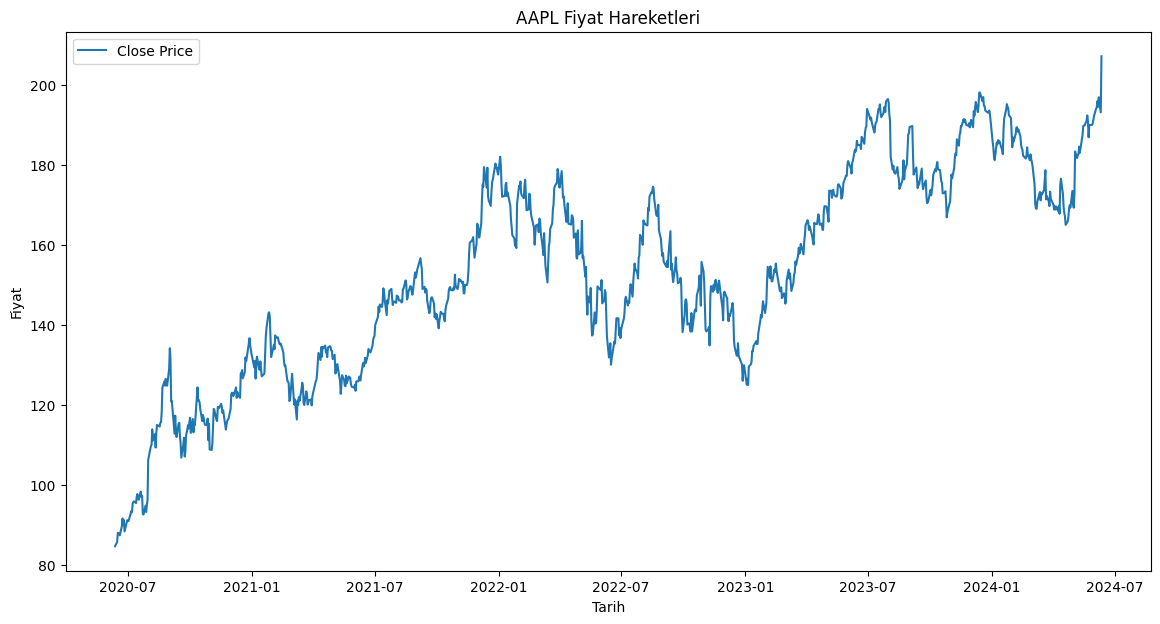

In [3]:
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 7))
plt.plot(stock_data['Close'], label='Close Price')
plt.title(f'{ticker} Fiyat Hareketleri')
plt.xlabel('Tarih')
plt.ylabel('Fiyat')
plt.legend()
plt.show()


# Özellik Mühendisliği
Yeni bir özellik olarak günlük getiri hesaplanmıştır

In [4]:
stock_data['Returns'] = stock_data['Close'].pct_change()
stock_data.dropna(inplace=True)
stock_data.head()

,Open,High,Low,Close,Adj Close,Volume,Returns
Date,,,,,,,
2020-06-15,83.312500,86.419998,83.144997,85.747498,83.742317,138808800,0.012367
2020-06-16,87.864998,88.300003,86.180000,88.019997,85.961678,165428800,0.026502
2020-06-17,88.787498,88.849998,87.772499,87.897499,85.842033,114406400,-0.001392
2020-06-18,87.852501,88.362503,87.305000,87.932503,85.876213,96820400,0.000398
2020-06-19,88.660004,89.139999,86.287498,87.430000,85.385475,264476000,-0.005715


# Veri Bölme
Veri seti, eğitim ve test verileri olarak ikiye bölündü

In [15]:
from sklearn.model_selection import train_test_split

X = stock_data[['Open', 'High', 'Low', 'Volume', 'Returns']]
y = stock_data['Close']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Model Eğitimi ve Tahmin (Random Forest Regressor)
random Forest Regressor modeli eğitim ve tahmin

In [16]:
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
model = RandomForestRegressor(n_estimators=10)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)


# Performans Değerlendirmesi
Modelin performansı MSE (Mean Squared Error) ve R² (R-squared) metrikleri ile değerlendirilmesi

In [17]:
from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')


Mean Squared Error: 1.4617458817159443
R-squared: 0.9974931543740091


# Tahmin Sonuçlarının Görselleştirilmesi
Tahmin edilen fiyatlar ile gerçek fiyatlar karşılaştırılmış ve grafiklerle görselleştirilmiştir:

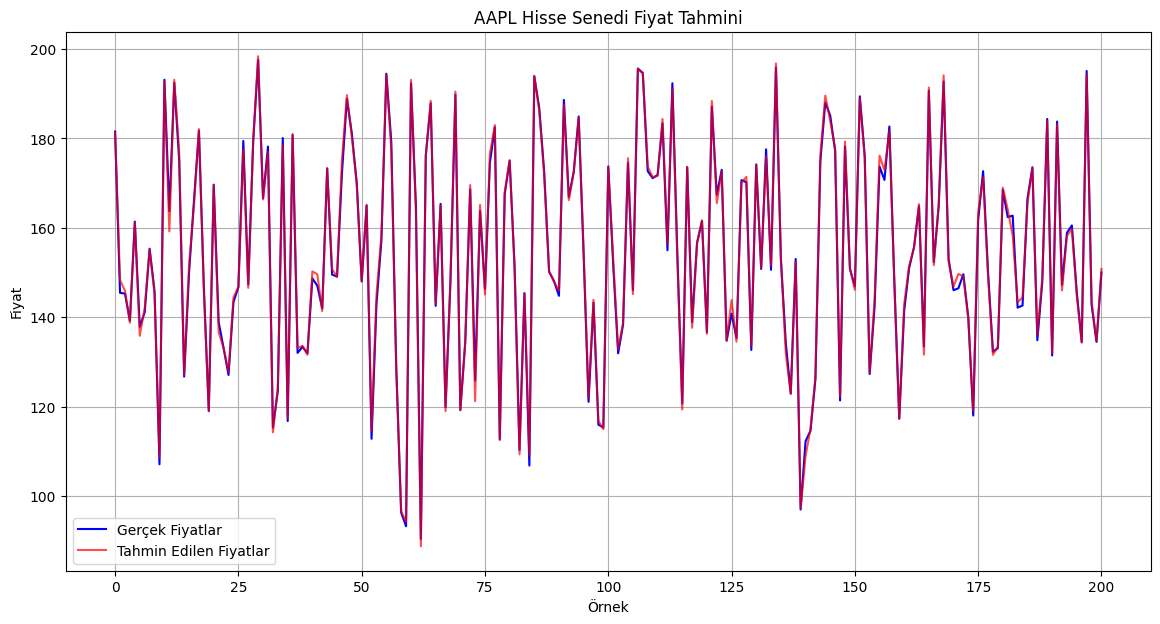

In [18]:
plt.figure(figsize=(14, 7))
plt.plot(y_test.values, label='Gerçek Fiyatlar', color='b')
plt.plot(y_pred, label='Tahmin Edilen Fiyatlar', color='r', alpha=0.7)
plt.title(f'{ticker} Hisse Senedi Fiyat Tahmini')
plt.xlabel('Örnek')
plt.ylabel('Fiyat')
plt.legend()
plt.grid(True)
plt.show()


# Yeni Veri ile Tahmin
Son gözlem kullanılarak bir hafta sonrası tahmini yaptırdım

In [19]:
last_observation = stock_data.iloc[-1]
new_data_week = [[last_observation['Open'], last_observation['High'], last_observation['Low'], last_observation['Volume'], last_observation['Returns']]]
predicted_close_price_week = model.predict(new_data_week)
print(f"Bir hafta sonrası tahmini kapanış fiyatı: {predicted_close_price_week[0]}")


Bir hafta sonrası tahmini kapanış fiyatı: 204.06099700927734


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


# Model Eğitimi ve Tahmin (Gradient Boosting Regressor)
Gradient Boosting Regressor modeli eğitilmiş ve tahmin yapılmıştır

In [20]:
model_gb = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
model_gb.fit(X_train, y_train)
y_pred_gb = model_gb.predict(X_test)


# Performans Değerlendirmesi
Gradient Boosting Regressor modelinin performansı MSE ve R² metrikleri ile değerlendirilmiştir:

In [21]:
mse_gb = mean_squared_error(y_test, y_pred_gb)
r2_gb = r2_score(y_test, y_pred_gb)
print(f'Gradient Boosting Regressor Mean Squared Error: {mse_gb}')
print(f'Gradient Boosting Regressor R-squared: {r2_gb}')


Gradient Boosting Regressor Mean Squared Error: 1.1693409202319989
Gradient Boosting Regressor R-squared: 0.9979946191688704


# Tahmin Sonuçlarının Görselleştirilmesi
Gradient Boosting Regressor ile tahmin edilen fiyatlar ile gerçek fiyatlar karşılaştırılmış ve grafiklerle görselleştirilmiştir

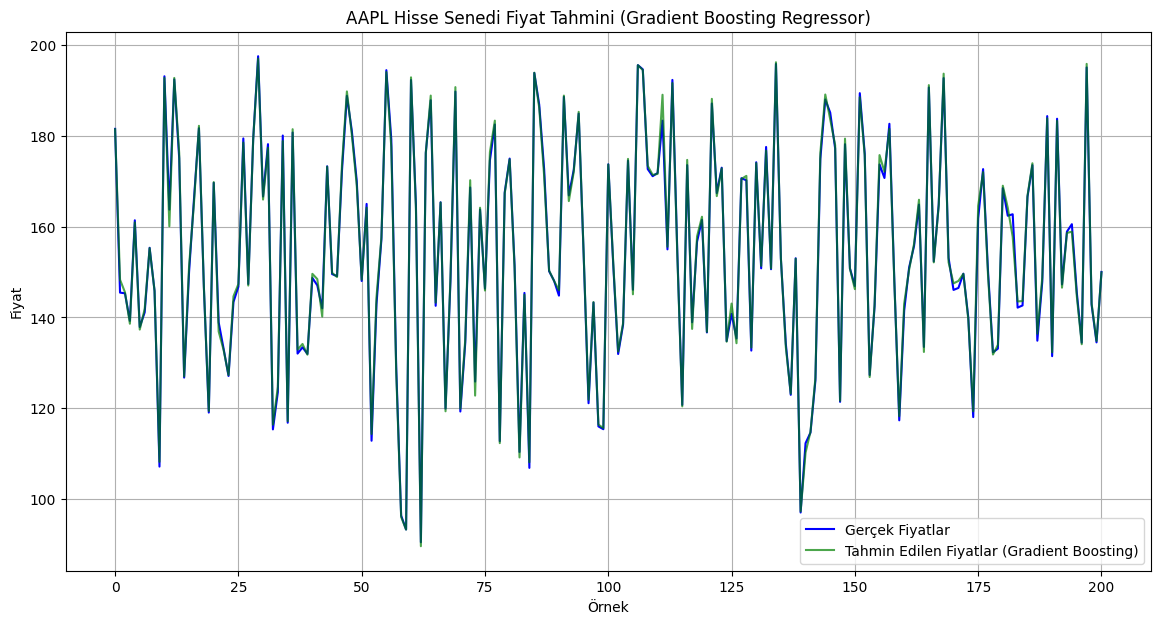

In [22]:
plt.figure(figsize=(14, 7))
plt.plot(y_test.values, label='Gerçek Fiyatlar', color='b')
plt.plot(y_pred_gb, label='Tahmin Edilen Fiyatlar (Gradient Boosting)', color='g', alpha=0.7)
plt.title(f'{ticker} Hisse Senedi Fiyat Tahmini (Gradient Boosting Regressor)')
plt.xlabel('Örnek')
plt.ylabel('Fiyat')
plt.legend()
plt.grid(True)
plt.show()


# Yeni Veri ile Tahmin
bir hafta sonrası tahmin yaptırıldı

In [23]:
last_observation_gb = stock_data.iloc[-1]
new_data_week_gb = [[last_observation_gb['Open'], last_observation_gb['High'], last_observation_gb['Low'], last_observation_gb['Volume'], last_observation_gb['Returns']]]
predicted_close_price_week_gb = model_gb.predict(new_data_week_gb)
print(f"Bir hafta sonrası tahmini kapanış fiyatı (Gradient Boosting): {predicted_close_price_week_gb[0]}")


Bir hafta sonrası tahmini kapanış fiyatı (Gradient Boosting): 206.82819828299395


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  warnings.warn(


# Sonuç ve Değerlendirme
Random Forest Regressor ve Gradient Boosting Regressor modellerinin performansları karşılaştırılmış ve Gradient Boosting Regressor modelinin daha iyi sonuçlar verdiği gözlemlenmiştir. Bu analiz, hisse senedi fiyat tahmini için kullanılabilecek makine öğrenimi modellerinin nasıl uygulanabileceğini ve performanslarının nasıl değerlendirilebileceğini göstermektedir.

Projenin amacı, iki farklı model kullanarak en iyi tahmin modelini belirlemek ve gelecekteki fiyat hareketlerini daha iyi tahmin etmektir. Bu tür modeller, yatırım kararları ve finansal analizlerde önemli bir rol oynayabilir.